In [1]:
import random
import time
from tkinter import *
import numpy as np
import matplotlib.pyplot as plt


def neighboring_spins(i_list, j_list, sl):
    """
    Function returning the position of the neighbouring spins of a list of 
    spins identified by their positions in the spin lattice.
    
    Parameters
    ==========
    i_list : Spin position first indices.
    j_list : Spin position second indices.
    sl : Spin lattice.
    """

    Ni, Nj = sl.shape  # Shape of the spin lattice.
    
    # Position neighbors right.
    i_r = i_list  
    j_r = list(map(lambda x:(x + 1) % Nj, j_list))   

    # Position neighbors left.
    i_l = i_list  
    j_l = list(map(lambda x:(x - 1) % Nj, j_list))   

    # Position neighbors up.
    i_u = list(map(lambda x:(x - 1) % Ni, i_list))  
    j_u = j_list  

    # Position neighbors down.
    i_d = list(map(lambda x:(x + 1) % Ni, i_list)) 
    j_d = j_list   

    # Spin values.
    sl_u = sl[i_u, j_u]
    sl_d = sl[i_d, j_d]
    sl_l = sl[i_l, j_l]
    sl_r = sl[i_r, j_r]

    return sl_u, sl_d, sl_l, sl_r

In [2]:
def energies_spins(i_list, j_list, sl, H, J):
    """
    Function returning the energies of the states for the spins in given 
    positions in the spin lattice.
    
    Parameters
    ==========
    i_list : Spin position first indices.
    j_list : Spin position second indices.
    sl : Spin lattice.
    """
    
    sl_u, sl_d, sl_l, sl_r = neighboring_spins(i_list, j_list, sl)
    
    sl_s = sl_u + sl_d + sl_l + sl_r 
    
    E_u = - H - J * sl_s
    E_d =   H + J * sl_s 
    
    return E_u, E_d

In [3]:
def probabilities_spins(i_list, j_list, sl, H, J, T):
    """
    Function returning the energies of the states for the spins in given 
    positions in the spin lattice.
    
    Parameters
    ==========
    i_list : Spin position first indices.
    j_list : Spin position second indices.
    sl : Spin lattice.
    """
    
    E_u, E_d = energies_spins(i_list, j_list, sl, H, J)
    
    Ei = np.array([E_u, E_d])
    
    Z = np.sum(np.exp(- Ei / T), axis=0)  # Partition function.
    pi = 1 / np.array([Z, Z]) * np.exp(- Ei / T)  # Probability.

    return pi, Z       

## Task 1 

P1 - Plot m(H) 

2024-11-11 16:29:21.997 Python[86442:8327061] +[IMKClient subclass]: chose IMKClient_Legacy
2024-11-11 16:29:21.997 Python[86442:8327061] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


H = -5, Ising Model simulation done
H = -2, Ising Model simulation done
H = -1, Ising Model simulation done
H = -0.5, Ising Model simulation done
H = -0.2, Ising Model simulation done
H = -0.1, Ising Model simulation done
H = 0, Ising Model simulation done
H = 0.1, Ising Model simulation done
H = 0.2, Ising Model simulation done
H = 0.5, Ising Model simulation done
H = 1, Ising Model simulation done
H = 2, Ising Model simulation done
H = 5, Ising Model simulation done
Calculated magnetic susceptibility χ: 0.5577459999999999


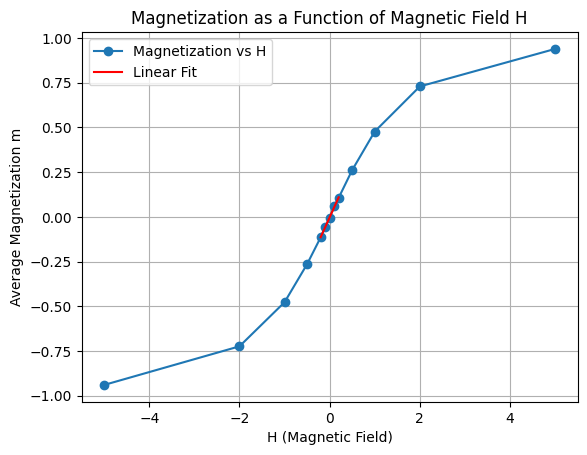

In [ ]:

N = 200  # Size of the splin lattice.
H_values = [-5, -2, -1, -0.5, -0.2, -0.1, 0, 0.1, 0.2, 0.5, 1, 2, 5]
J = 1  # Spin-spin coupling.
T = 5  # Temperature. Temperatura critica ~2.269.

f = 0.05  # Number of randomly selected spins to flip-test.
N_skip = 10 # Visualize status every N_skip steps. 
total_steps = 500 

window_size = 600

tk = Tk()
tk.geometry(f'{window_size + 20}x{window_size + 20}')
tk.configure(background='#000000')

canvas = Canvas(tk, background='#ECECEC')  # Generate animation window.
tk.attributes('-topmost', 0)
canvas.place(x=10, y=10, height=window_size, width=window_size)


def stop_loop(event):
    global running
    running = False
tk.bind("<Escape>", stop_loop)  # Bind the Escape key to stop the loop.
 
magnetizations = []

for H in H_values:
    sl = 2 * np.random.randint(2, size=(N, N)) - 1 # Initialize N*N self-spin lattice ( +1 or -1)
    Nspins = np.size(sl) # Total number of spins in the spin lattice.
    Ni, Nj = sl.shape
    S = int(np.ceil(Nspins * f))  # Number of randomly selected spins.

    step = 0
    magnetization_list = []
    running = True  # Flag to control the loop.

    while running and step < total_steps:
        ns = random.sample(range(Nspins), S)
        i_list = list(map(lambda x: x % Ni, ns)) 
        j_list = list(map(lambda x: x // Ni, ns)) 

        pi, Z = probabilities_spins(i_list, j_list, sl, H, J, T)

        rn = np.random.rand(S)

        for i in range(S):
            if rn[i] > pi[0, i]:
                sl[i_list[i], j_list[i]] = -1
            else:
                sl[i_list[i], j_list[i]] = 1
        
        # record magnetization
        if total_steps - 300 <= step < total_steps - 100:
            magnetization = np.sum(sl) / (N * N)
            magnetization_list.append(magnetization)

        # Update animation frame.
        if step % N_skip == 0:        
            canvas.delete('all')
            spins = []
            for i in range(Ni):
                for j in range(Nj):
                    spin_color = '#FFFFFF' if sl[i,j] == 1 else '#000000'
                    spins.append(
                        canvas.create_rectangle(
                            j / Nj * window_size, 
                            i / Ni * window_size,
                            (j + 1) / Nj * window_size, 
                            (i + 1) / Ni * window_size,
                            outline='', 
                            fill=spin_color,
                        )
                    )
            
            tk.title(f'Iteration {step}')
            tk.update_idletasks()
            tk.update()
            time.sleep(0.1)  # Increase to slow down the simulation.

        step += 1
        if step >= total_steps:
            running = False

    print(f'H = {H}, Ising Model simulation done')
    
    avg_magnetization = np.mean(magnetization_list)
    magnetizations.append(avg_magnetization)


small_H_values = [-0.2, -0.1, 0, 0.1, 0.2,]
small_magnetizations = [magnetizations[H_values.index(h)] for h in small_H_values]
fit_params = np.polyfit(small_H_values, small_magnetizations, 1)  # linear fit 
χ = fit_params[0]  
print(f'Calculated magnetic susceptibility χ: {χ}')

fit_function = np.poly1d(fit_params)
fit_H_values = np.linspace(min(small_H_values), max(small_H_values), 100)
fit_magnetizations = fit_function(fit_H_values)

# Plot m(H) 
plt.figure()
plt.plot(H_values, magnetizations, 'o-', label='Magnetization vs H')
plt.plot(fit_H_values, fit_magnetizations, 'r-', label='Linear Fit') 
plt.xlabel('H (Magnetic Field)')
plt.ylabel('Average Magnetization m')
plt.title('Magnetization as a Function of Magnetic Field H')
plt.legend()
plt.grid(True)
plt.savefig('Magnetization_as_Function_of_Magnetic_Field_H.png', format='png', dpi=300)
plt.show()


tk.update_idletasks()
tk.update()
tk.mainloop()  # Release animation handle (close window to finish).